<a href="https://colab.research.google.com/github/ChabiMax/author_network/blob/main/Main%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests as req
import networkx as nx
import numpy as np
from tqdm import *
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
try :
  from networkx.drawing.nx_agraph import graphviz_layout
except :
  !sudo apt-get install python-dev graphviz libgraphviz-dev pkg-config
  !brew install graphviz
  !pip install graphviz
  !pip install pygraphviz 
  from networkx.drawing.nx_agraph import graphviz_layout
  
git_url = "https://raw.githubusercontent.com/ChabiMax/author_network/main/Data/"

edge_table = pd.read_csv(git_url + 'edge_table.csv')
node_table = pd.read_csv(git_url + 'node_table.csv')


Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
python-dev is already the newest version (2.7.15~rc1-1).
graphviz is already the newest version (2.40.1-2).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://arch

In [ ]:
# Year subsets and building metrics

node_table['date_naissance'] = pd.to_numeric(node_table['date_naissance'])
node_table['date_mort'] = pd.to_numeric(node_table['date_mort'], errors='coerce')
node_table = node_table.dropna()

measure_list = {}
for année in tqdm_notebook(reversed(range(1000, 2025, 5))) :
  BOOL = (node_table.date_naissance + 15 < année) & (node_table.date_mort > année) & (node_table.date_naissance + 70 > année)
  id_subset = list(node_table[BOOL]['Id'])
  if len(id_subset) > 10 :
    try :
      edge_table_subset = edge_table[edge_table['source'].isin(id_subset) & edge_table['target'].isin(id_subset)]
      graph = nx.from_pandas_edgelist(edge_table_subset, source = 'source', target = 'target')
      directed_graph = nx.from_pandas_edgelist(edge_table_subset, source = 'source', target = 'target', create_using=nx.DiGraph())
      graph_connected_components = sorted(nx.connected_components(graph), key=len, reverse=True)
      graph_giant = graph.subgraph(graph_connected_components[0])
      measure_list[année] = {'graph_size' : graph.number_of_nodes(),
                             'graph_giant_size' : graph_giant.number_of_nodes(),
                             'density_directed' : nx.density(directed_graph), 
                             'density_undirected' : nx.density(graph),
                             'density_giant' : nx.density(graph_giant),
                             'average_clustering' : nx.average_clustering(graph_giant),
                             'transitivity' : nx.transitivity(graph)}
    except : 
      pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


0it [00:00, ?it/s]

In [ ]:
annee_data = pd.DataFrame(measure_list).T
annee_data['annee'] = annee_data.index

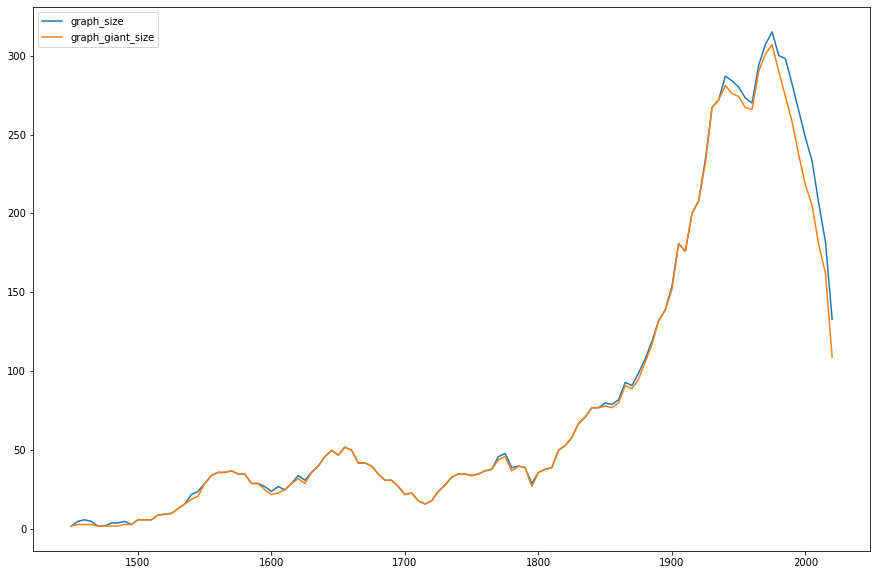

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(annee_data['annee'], annee_data['graph_size'], label = 'graph_size')
plt.plot(annee_data['annee'], annee_data['graph_giant_size'], label = 'graph_giant_size')
plt.legend()
plt.show()


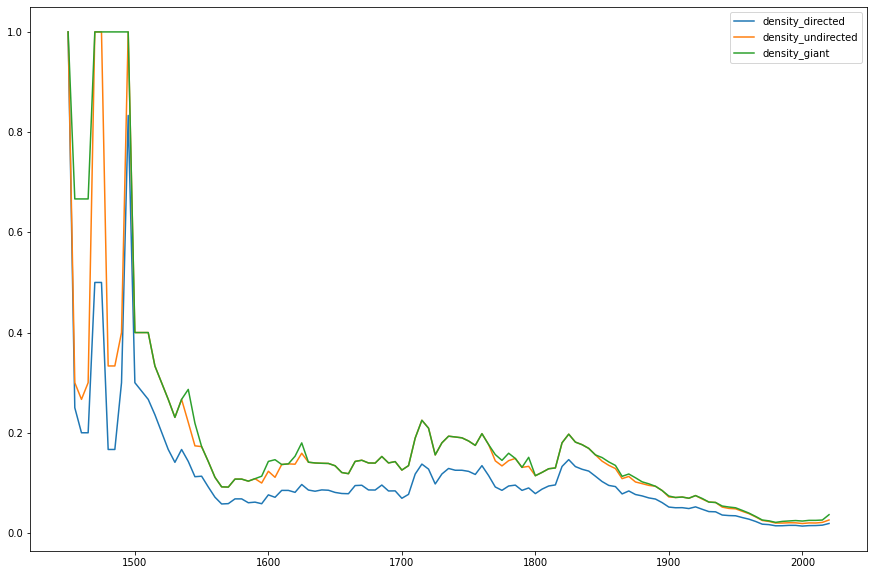

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(annee_data['annee'], annee_data['density_directed'], label = 'density_directed')
plt.plot(annee_data['annee'], annee_data['density_undirected'], label = 'density_undirected')
plt.plot(annee_data['annee'], annee_data['density_giant'], label = 'density_giant')
plt.legend()
plt.show()


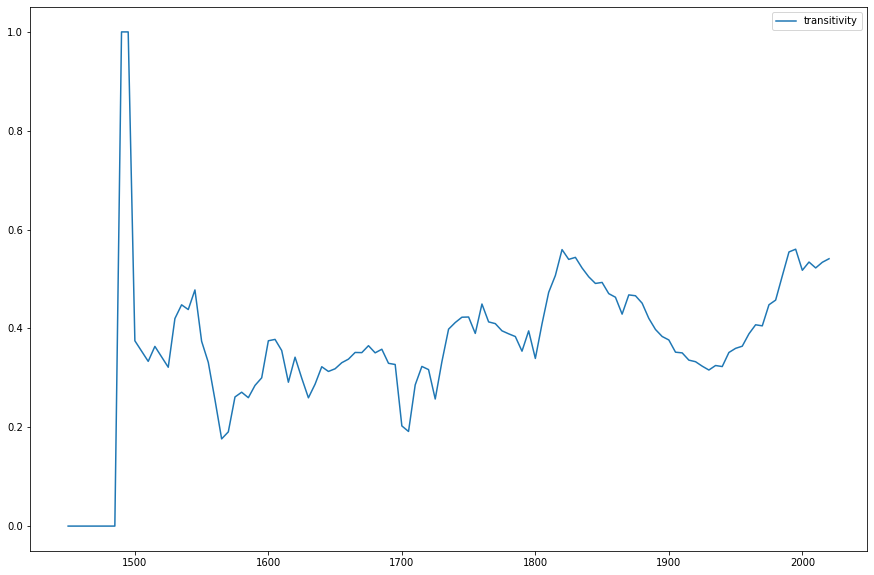

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(annee_data['annee'], annee_data['transitivity'], label = 'transitivity')
plt.legend()
plt.show()


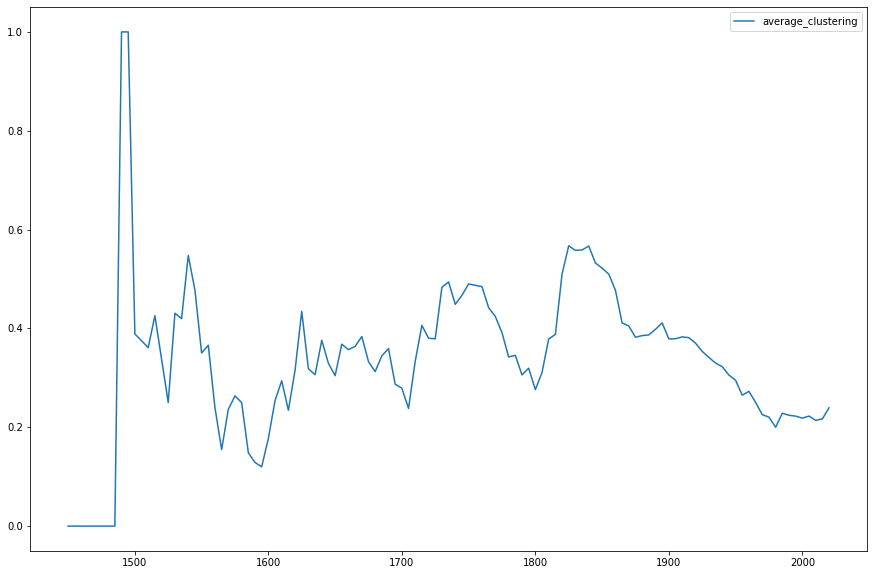

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(annee_data['annee'], annee_data['average_clustering'], label = 'average_clustering')
plt.legend()
plt.show()


In [ ]:

node_table['date_naissance'] = pd.to_numeric(node_table['date_naissance'])
node_table['date_mort'] = pd.to_numeric(node_table['date_mort'], errors='coerce')
node_table = node_table.dropna()

# Two year subset for 2D mapping

connection_rate_list = {}
for année in tqdm_notebook(reversed(range(1500, 2025, 10))) :
  BOOL = (node_table.date_naissance + 15 < année) & (node_table.date_mort > année) & (node_table.date_naissance + 70 > année)
  id_subset = list(node_table[BOOL]['Id'])
  temp_list = {}
  if len(id_subset) > 10 :
    for année_bis in range(1500, 2025, 10) :  
      BOOL = (node_table.date_naissance + 15 < année_bis) & (node_table.date_mort > année_bis) & (node_table.date_naissance + 70 > année_bis)
      id_subset_bis = list(node_table[BOOL]['Id'])
      if len(id_subset_bis) > 10 :
        try :
          
          BOOL = edge_table['source'].isin(id_subset + id_subset_bis) & edge_table['target'].isin(id_subset + id_subset_bis)
          edge_table_subset_merged = edge_table[BOOL]

          #graph_merged = nx.from_pandas_edgelist(edge_table_subset_merged, source = 'source', target = 'target')
          #directed_graph_merged = nx.from_pandas_edgelist(edge_table_subset_merged, source = 'source', target = 'target', create_using=nx.DiGraph())
          #graph_merged_connected_components = sorted(nx.connected_components(graph_merged), key=len, reverse=True)
          #graph_merged_giant = graph_merged.subgraph(graph_merged_connected_components[0])
          
          giant_size = annee_data.loc[annee_data['annee'] == année, 'graph_giant_size'].iat[0]
          BOOL = edge_table['source'].isin(id_subset) & edge_table['target'].isin(id_subset_bis)
          edges_to_bis = len(edge_table_subset_merged[BOOL])
          possible_connections = len(id_subset)*len(id_subset_bis) - len(id_subset + id_subset_bis) + len(set(id_subset + id_subset_bis))
          connection_rate = edges_to_bis*100 / possible_connections
          temp_list[str(année_bis) + '_bis'] = connection_rate

        except : 
          pass

    connection_rate_list[str(année)] = temp_list


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


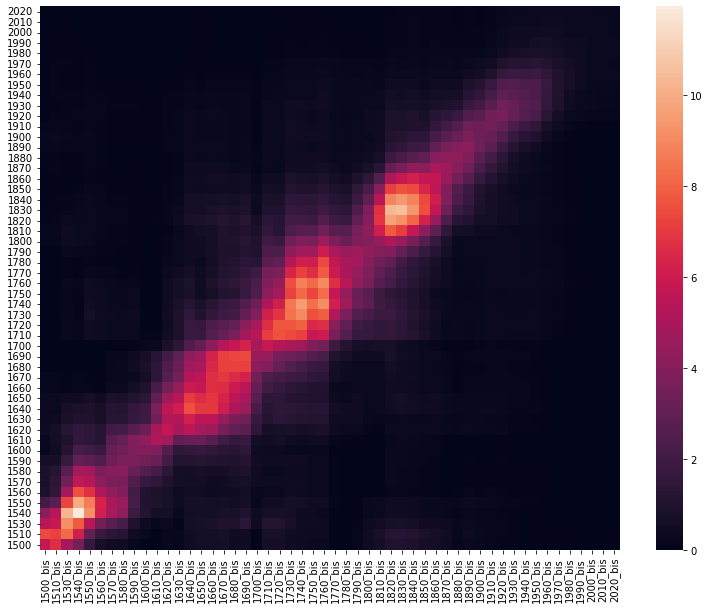

In [ ]:
plt.rcParams['figure.figsize'] = [13, 10]
connection_rate_data = pd.DataFrame(connection_rate_list).T
sns.heatmap(connection_rate_data)


In [ ]:

node_table['date_naissance'] = pd.to_numeric(node_table['date_naissance'])
node_table['date_mort'] = pd.to_numeric(node_table['date_mort'], errors='coerce')
node_table = node_table.dropna()

# Two year subset for 2D mapping

connection_rate_yearpond_list = {}
for année in tqdm_notebook(reversed(range(1500, 2025, 10))) :
  BOOL = (node_table.date_naissance + 15 < année) & (node_table.date_mort > année) & (node_table.date_naissance + 70 > année)
  id_subset = list(node_table[BOOL]['Id'])
  temp_list = {}
  if len(id_subset) > 10 :
    for année_bis in range(1500, 2025, 10) :  
      BOOL = (node_table.date_naissance + 15 < année_bis) & (node_table.date_mort > année_bis) & (node_table.date_naissance + 70 > année_bis)
      id_subset_bis = list(node_table[BOOL]['Id'])
      if len(id_subset_bis) > 10 :
        try :
          
          BOOL = edge_table['source'].isin(id_subset + id_subset_bis) & edge_table['target'].isin(id_subset + id_subset_bis)
          edge_table_subset_merged = edge_table[BOOL]

          #graph_merged = nx.from_pandas_edgelist(edge_table_subset_merged, source = 'source', target = 'target')
          #directed_graph_merged = nx.from_pandas_edgelist(edge_table_subset_merged, source = 'source', target = 'target', create_using=nx.DiGraph())
          #graph_merged_connected_components = sorted(nx.connected_components(graph_merged), key=len, reverse=True)
          #graph_merged_giant = graph_merged.subgraph(graph_merged_connected_components[0])
          
          giant_size = annee_data.loc[annee_data['annee'] == année, 'graph_giant_size'].iat[0]
          BOOL = edge_table['source'].isin(id_subset) & edge_table['target'].isin(id_subset_bis)
          edges_to_bis = len(edge_table_subset_merged[BOOL])
          possible_connections = len(id_subset)*len(id_subset_bis) - len(id_subset + id_subset_bis) + len(set(id_subset + id_subset_bis))
          connection_rate = edges_to_bis*100*np.sqrt(abs(année - année_bis) + 2) / possible_connections
          temp_list[str(année_bis) + '_bis'] = connection_rate

        except : 
          pass

    connection_rate_yearpond_list[str(année)] = temp_list


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


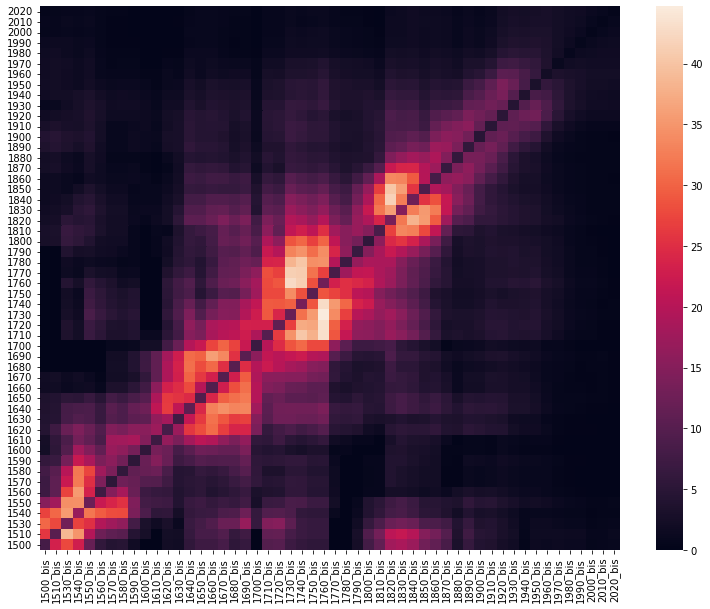

In [ ]:
plt.rcParams['figure.figsize'] = [13, 10]
connection_rate_yearpond_data = pd.DataFrame(connection_rate_yearpond_list).T
sns.heatmap(connection_rate_yearpond_data)


# Graph genres


In [42]:
dictionary_genres = pd.read_pickle(git_url + 'dictionary_genres_pickle.pkl')
nodes_table_genres = pd.DataFrame(dictionary_genres).T
nodes_table_genres['Id_genre'] = nodes_table_genres.index

edge_genres = {}
id_edge = 0
for auteur in tqdm_notebook(node_table.Id) :
  meme_genre = node_table[node_table.Id == auteur].meme_genre.iat[0] 
  meme_genre = eval(meme_genre)
  try :
    for auteur_bis in meme_genre :
        edge_genres[id_edge] = {'source' : auteur, 'target' : auteur_bis}
        id_edge += 1
  except :
    pass
edge_genres_table = pd.DataFrame(edge_genres).T
edge_genres_table = edge_genres_table.drop_duplicates()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/1553 [00:00<?, ?it/s]

In [43]:
node_table['date_naissance'] = pd.to_numeric(node_table['date_naissance'])
node_table['date_mort'] = pd.to_numeric(node_table['date_mort'], errors='coerce')
node_attributes = node_table.set_index('Id').to_dict('index')

In [44]:
# plt.rcParams['figure.figsize'] = [20, 15]

# graph = nx.from_pandas_edgelist(edge_genres_table, source = 'source', target = 'target')
# nx.set_node_attributes(graph, node_attributes)
# label_dic = {}
# for id in node_attributes :
#   if id in list(graph.nodes) :
#     label_dic[id] = node_attributes[id]['Label']
# nx.draw(graph, pos = nx.nx_pydot.graphviz_layout(graph), node_size = 20, width = 0.1, labels = label_dic, with_labels = True)

In [45]:
# Year subsets and building metrics

node_table['date_naissance'] = pd.to_numeric(node_table['date_naissance'])
node_table['date_mort'] = pd.to_numeric(node_table['date_mort'], errors='coerce')
node_table = node_table.dropna()

measure_list = {}
for année in tqdm_notebook(reversed(range(1000, 2025, 5))) :
  BOOL = (node_table.date_naissance + 15 < année) & (node_table.date_mort > année) & (node_table.date_naissance + 70 > année)
  id_subset = list(node_table[BOOL]['Id'])
  if len(id_subset) > 10 :
    try :
      edge_table_subset = edge_genres_table[edge_genres_table['source'].isin(id_subset) & edge_genres_table['target'].isin(id_subset)]
      graph = nx.from_pandas_edgelist(edge_table_subset, source = 'source', target = 'target')
      graph_connected_components = sorted(nx.connected_components(graph), key=len, reverse=True)
      graph_giant = graph.subgraph(graph_connected_components[0])
      measure_list[année] = {'graph_size' : graph.number_of_nodes(),
                             'graph_giant_size' : graph_giant.number_of_nodes(),
                             'density' : nx.density(graph),
                             'density_giant' : nx.density(graph_giant),
                             'average_clustering' : nx.average_clustering(graph_giant),
                             'transitivity' : nx.transitivity(graph)}
    except : 
      pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


0it [00:00, ?it/s]

In [46]:
annee_data = pd.DataFrame(measure_list).T
annee_data['annee'] = annee_data.index

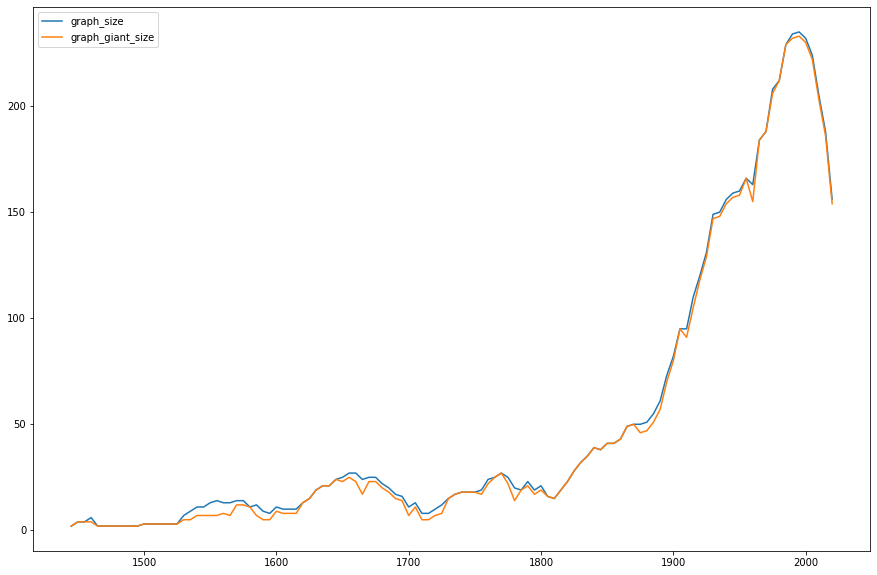

In [47]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(annee_data['annee'], annee_data['graph_size'], label = 'graph_size')
plt.plot(annee_data['annee'], annee_data['graph_giant_size'], label = 'graph_giant_size')
plt.legend()
plt.show()


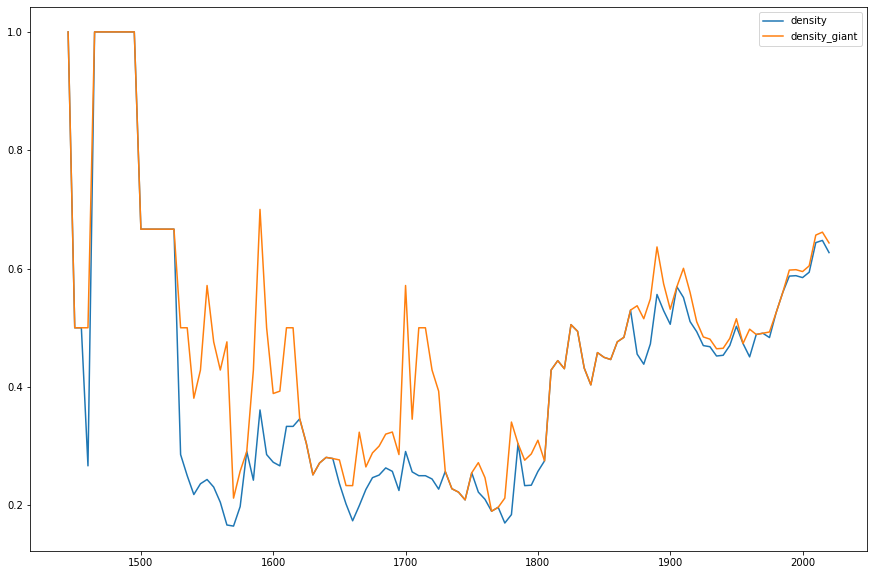

In [48]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(annee_data['annee'], annee_data['density'], label = 'density')
plt.plot(annee_data['annee'], annee_data['density_giant'], label = 'density_giant')
plt.legend()
plt.show()


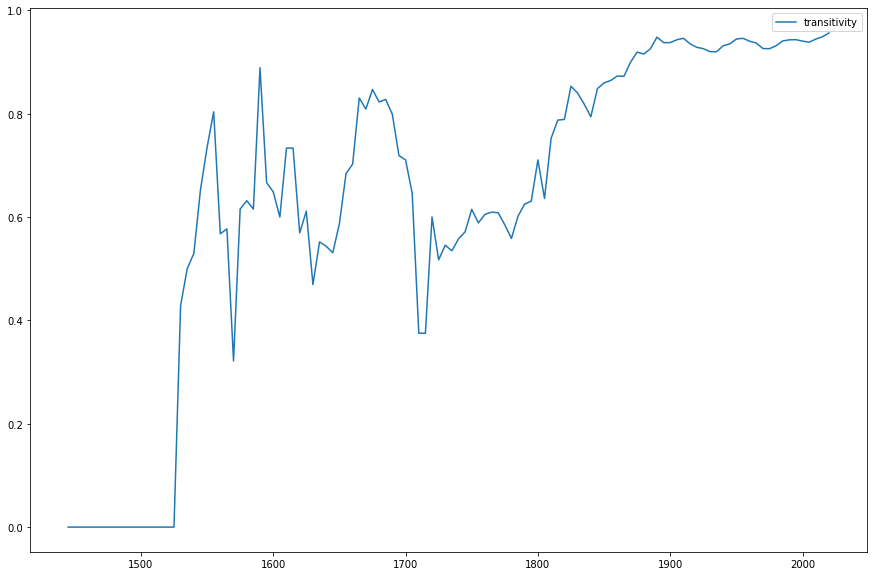

In [49]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(annee_data['annee'], annee_data['transitivity'], label = 'transitivity')
plt.legend()
plt.show()


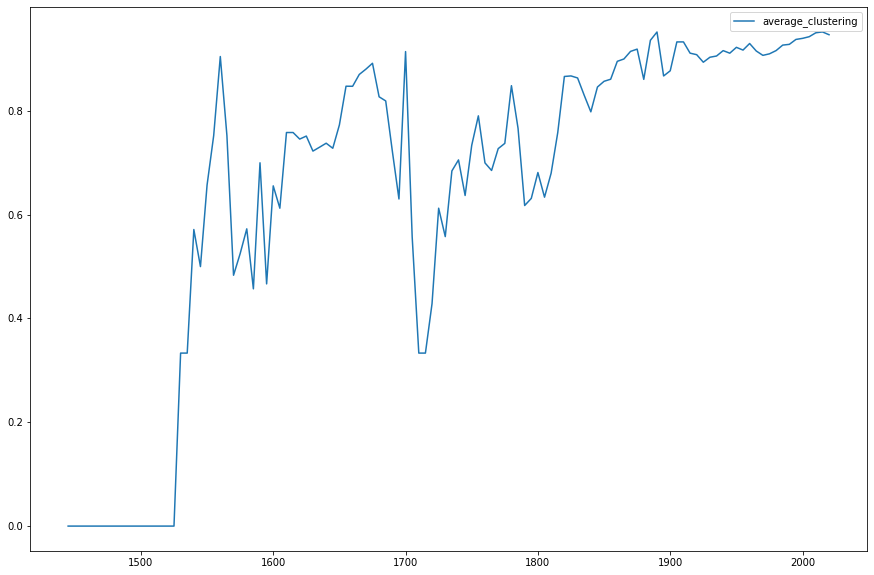

In [50]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(annee_data['annee'], annee_data['average_clustering'], label = 'average_clustering')
plt.legend()
plt.show()


In [51]:

node_table['date_naissance'] = pd.to_numeric(node_table['date_naissance'])
node_table['date_mort'] = pd.to_numeric(node_table['date_mort'], errors='coerce')
node_table = node_table.dropna()

# Two year subset for 2D mapping

connection_rate_list = {}
for année in tqdm_notebook(reversed(range(1500, 2025, 10))) :
  BOOL = (node_table.date_naissance + 15 < année) & (node_table.date_mort > année) & (node_table.date_naissance + 70 > année)
  id_subset = list(node_table[BOOL]['Id'])
  temp_list = {}
  if len(id_subset) > 10 :
    for année_bis in range(1500, 2025, 10) :  
      BOOL = (node_table.date_naissance + 15 < année_bis) & (node_table.date_mort > année_bis) & (node_table.date_naissance + 70 > année_bis)
      id_subset_bis = list(node_table[BOOL]['Id'])
      if len(id_subset_bis) > 10 :
        try :
          
          BOOL = edge_genres_table['source'].isin(id_subset + id_subset_bis) & edge_genres_table['target'].isin(id_subset + id_subset_bis)
          edge_table_subset_merged = edge_genres_table[BOOL]

          #graph_merged = nx.from_pandas_edgelist(edge_table_subset_merged, source = 'source', target = 'target')
          #directed_graph_merged = nx.from_pandas_edgelist(edge_table_subset_merged, source = 'source', target = 'target', create_using=nx.DiGraph())
          #graph_merged_connected_components = sorted(nx.connected_components(graph_merged), key=len, reverse=True)
          #graph_merged_giant = graph_merged.subgraph(graph_merged_connected_components[0])
          
          giant_size = annee_data.loc[annee_data['annee'] == année, 'graph_giant_size'].iat[0]
          BOOL = edge_genres_table['source'].isin(id_subset) & edge_genres_table['target'].isin(id_subset_bis)
          edges_to_bis = len(edge_table_subset_merged[BOOL])
          possible_connections = len(id_subset)*len(id_subset_bis) - len(id_subset + id_subset_bis) + len(set(id_subset + id_subset_bis))
          connection_rate = edges_to_bis*100 / possible_connections
          temp_list[str(année_bis) + '_bis'] = connection_rate

        except : 
          pass

    connection_rate_list[str(année)] = temp_list


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


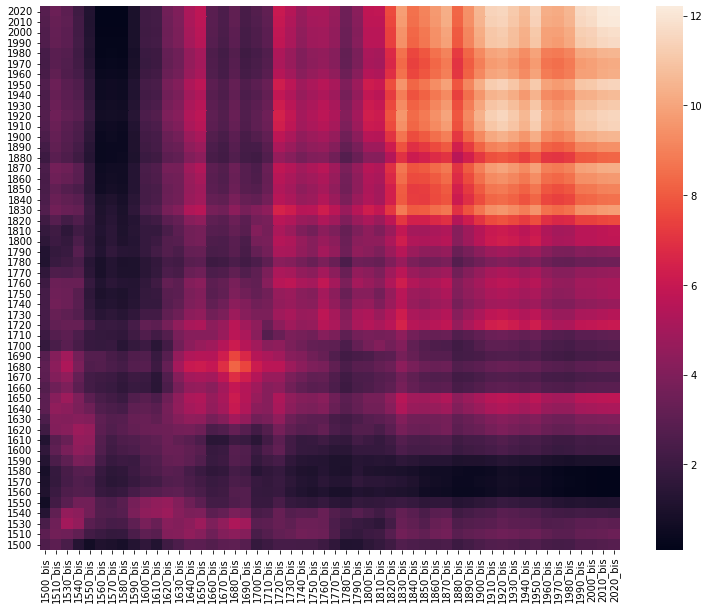

In [52]:
plt.rcParams['figure.figsize'] = [13, 10]
connection_rate_data = pd.DataFrame(connection_rate_list).T
sns.heatmap(connection_rate_data)


In [53]:

node_table['date_naissance'] = pd.to_numeric(node_table['date_naissance'])
node_table['date_mort'] = pd.to_numeric(node_table['date_mort'], errors='coerce')
node_table = node_table.dropna()

# Two year subset for 2D mapping

connection_rate_yearpond_list = {}
for année in tqdm_notebook(reversed(range(1500, 2025, 10))) :
  BOOL = (node_table.date_naissance + 15 < année) & (node_table.date_mort > année) & (node_table.date_naissance + 70 > année)
  id_subset = list(node_table[BOOL]['Id'])
  temp_list = {}
  if len(id_subset) > 10 :
    for année_bis in range(1500, 2025, 10) :  
      BOOL = (node_table.date_naissance + 15 < année_bis) & (node_table.date_mort > année_bis) & (node_table.date_naissance + 70 > année_bis)
      id_subset_bis = list(node_table[BOOL]['Id'])
      if len(id_subset_bis) > 10 :
        try :
          
          BOOL = edge_genres_table['source'].isin(id_subset + id_subset_bis) & edge_genres_table['target'].isin(id_subset + id_subset_bis)
          edge_table_subset_merged = edge_genres_table[BOOL]

          #graph_merged = nx.from_pandas_edgelist(edge_table_subset_merged, source = 'source', target = 'target')
          #directed_graph_merged = nx.from_pandas_edgelist(edge_table_subset_merged, source = 'source', target = 'target', create_using=nx.DiGraph())
          #graph_merged_connected_components = sorted(nx.connected_components(graph_merged), key=len, reverse=True)
          #graph_merged_giant = graph_merged.subgraph(graph_merged_connected_components[0])
          
          giant_size = annee_data.loc[annee_data['annee'] == année, 'graph_giant_size'].iat[0]
          BOOL = edge_genres_table['source'].isin(id_subset) & edge_genres_table['target'].isin(id_subset_bis)
          edges_to_bis = len(edge_table_subset_merged[BOOL])
          possible_connections = len(id_subset)*len(id_subset_bis) - len(id_subset + id_subset_bis) + len(set(id_subset + id_subset_bis))
          connection_rate = edges_to_bis*100*np.sqrt(abs(année - année_bis) + 2) / possible_connections
          temp_list[str(année_bis) + '_bis'] = connection_rate

        except : 
          pass

    connection_rate_yearpond_list[str(année)] = temp_list


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


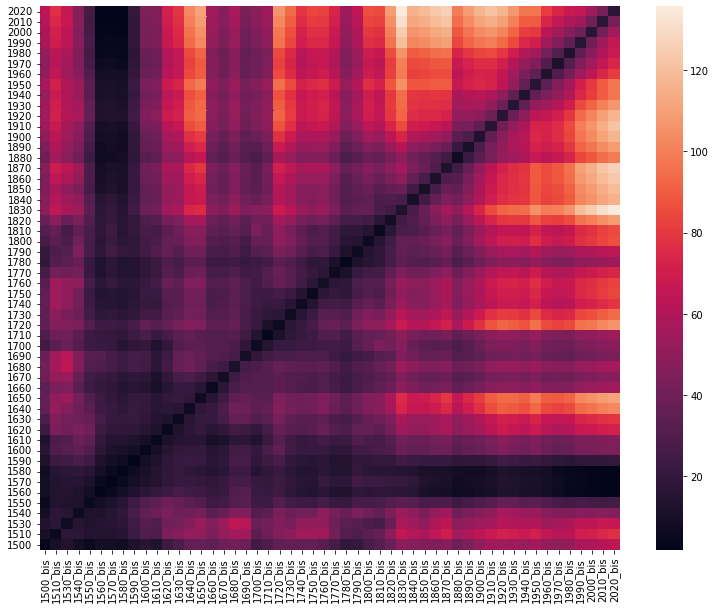

In [54]:
plt.rcParams['figure.figsize'] = [13, 10]
connection_rate_yearpond_data = pd.DataFrame(connection_rate_yearpond_list).T
sns.heatmap(connection_rate_yearpond_data)
